In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 715.0/715.0 kB 11.2 MB/s eta 0:00:00


### Use of Custom Dataset in google drive

### Dataset Path

- YOLOv8 runs through looking at the data.yaml file inside the dataset folder.
- There defaults path of train and valid must be changed to the respective paths of the train and valid folder in google drive.
- To do that go to that data.yaml file in your dataset drive location and double click and change the paths.

**Ex:**
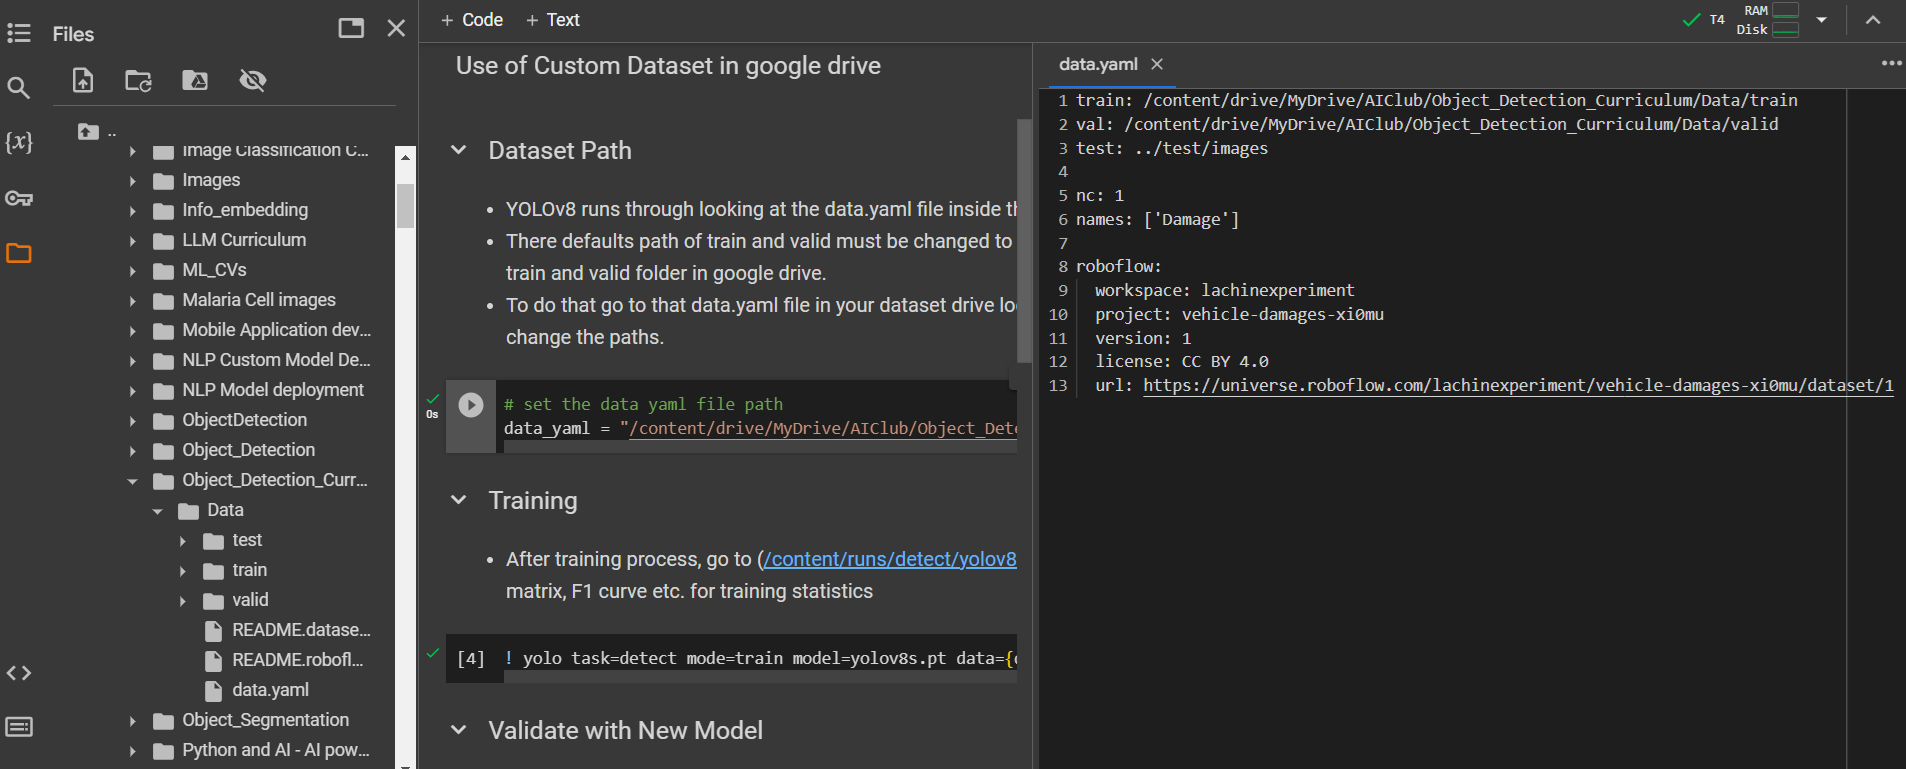

In [3]:
# set the data yaml file path
data_yaml = "/content/drive/Shareddrives/Danika_Gupta_Work/Research/TextileRecycle/Datasets/textile-wash-dryset.v2i.yolov8/data.yaml"

### Training

- After training process, go to (/content/runs/detect/yolov8n_custom) look for confusion matrix, F1 curve etc. for training statistics

In [4]:
! yolo task=detect mode=train model=yolov8s.pt data={data_yaml} epochs=150 imgsz=640 name=yolov8n_custom

100% 21.5M/21.5M [00:00<00:00, 283MB/s]
Ultralytics YOLOv8.1.14 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/Shareddrives/Danika_Gupta_Work/Research/TextileRecycle/Datasets/textile-wash-dryset.v2i.yolov8/data.yaml, epochs=150, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_custom, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None

### Validate with New Model

In [ ]:
# set the model path
model_path = "/content/runs/detect/yolov8n_custom/weights/best.pt"
! yolo task=detect mode=val model={model_path} data={data_yaml}

Ultralytics YOLOv8.1.10 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/Shareddrives/Danika_Work_2/Mosquito-lab-Roboflow-noaug/Lab-mosquitoes.v1i.yolov8/train/labels.cache... 400 images, 0 backgrounds, 0 corrupt: 100% 400/400 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 25/25 [00:14<00:00,  1.68it/s]
                   all        400        400      0.986      0.982      0.995      0.933
      Aedes albopictus        400        200      0.977          1      0.995      0.951
                 Culex        400        200      0.996      0.965      0.994      0.914
Speed: 1.6ms preprocess, 4.7ms inference, 0.0ms loss, 5.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


### Predict with the custom model

In [ ]:
# set the test data path
# please set the path of the test image folder
"""
test_data = "/content/drive/Shareddrives/Danika_Gupta_Work/Research/2024/Mosquito_SPIE/Datasets/DS_YOLO_2/MosquitoNet.v1i.yolov8/test/images/<>.jpg"
! yolo task=detect mode=predict model={model_path} conf=0.25 source={test_data}
"""

'\ntest_data = "/content/drive/Shareddrives/Danika_Gupta_Work/Research/2024/Mosquito_SPIE/Datasets/DS_YOLO_2/MosquitoNet.v1i.yolov8/test/images/<>.jpg"\n! yolo task=detect mode=predict model={model_path} conf=0.25 source={test_data}\n'

In [ ]:
model_path = "/content/runs/detect/yolov8n_custom/weights/best.pt"
# Detect on test split of original data
! yolo task=detect mode=test model='/content/runs/detect/yolov8n_custom/weights/best.pt' conf=0.25 data='/content/drive/Shareddrives/Danika_Gupta_Work/Research/2024/Mosquito_SPIE/Datasets/DS_YOLO_2/MosquitoNet.v1i.yolov8/test/images'
#! yolo task=detect mode=test model='/content/runs/detect/yolov8n_custom/weights/best.pt' conf=0.25 data={data_yaml}

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 509, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=test'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'task=detect', 'mode=test', 'model=/content/runs/detect/yolov8n_custom/weights/best.pt', 'conf=0.25', 'data=/content/drive/Shareddrives/Danika_Gupta_Work/Research/2024/Mosquito_SPIE/Datasets/DS_YOLO_2/MosquitoNet.v1i.yolov8/data.yaml']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose', 'obb')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any

In [ ]:
# Detect on test split of original data
! yolo task=detect mode=predict model='/content/runs/detect/yolov8n_custom/weights/best.pt' conf=0.25 conf=0.25 source={test_external}

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 541, in entrypoint
    model = YOLO(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 134, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 220, in _load
    weights = checks.check_file(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py", line 497, in check_file
    raise FileNotFoundError(f"'{file}' does not exist")
FileNotFoundError: '{model_path}' does not exist


### Save the best model

- Inside this folder (/content/runs/detect/yolov8n_custom/weights) best.pt and last.pt files are there. They are the model weights of best and last check points. Save them for later use.

In [ ]:
import shutil
import os

def create_directory(directory_path):
    # Check if the directory exists
    if not os.path.exists(directory_path):
        # If it doesn't exist, create it
        os.makedirs(directory_path)
        print(f"Directory '{directory_path}' created.")
    else:
        print(f"Directory '{directory_path}' already exists.")

# Specify the directory path you want to check/create
learning_rate = '0.01'
model_name = 'yolov8_epochs_'+ str(5)+ '_lr_'+str(learning_rate)
model_folder = '/content/drive/Shareddrives/Danika_Gupta_Work/Research/2024/Mosquito_SPIE/Datasets/DS_YOLO_2/MosquitoNet.v1i.yolov8/Model/'
destination_path = model_folder + model_name

# Call the function to check and create the directory
create_directory(destination_path)

source_path = '/content/runs/detect'
shutil.move(source_path, destination_path)

Directory '/content/drive/Shareddrives/Danika_Gupta_Work/Research/2024/Mosquito_SPIE/Datasets/DS_YOLO_2/MosquitoNet.v1i.yolov8/Model/yolov8_epochs_5_lr_0.01' already exists.


Error: Destination path '/content/drive/Shareddrives/Danika_Gupta_Work/Research/2024/Mosquito_SPIE/Datasets/DS_YOLO_2/MosquitoNet.v1i.yolov8/Model/yolov8_epochs_5_lr_0.01/detect' already exists